# Assignment 1: Bayesian Linear Regression

**Deadline**:  Mon 11-Nov 2019, 23:59

|Nr|**Name**|**Student ID**|**Email**|
|--|--------|--------------|---------|
|1.| Jorrim Prins    |   11038934          | jorrim.prins@hotmail.com        |
|2.|     Vien Dinh    |     11002115       |    viendinh17@gmail.com     |
|3.|        |              |         |

**Declaration of Originality**

We whose names are given under 1., 2. and 3. above declare that:

1. These solutions are solely our own work.
2. We have not made (part of) these solutions available to any other student.
3. We shall not engage in any other activities that will dishonestly improve my results or dishonestly improve or hurt the results of others.

## Instructions for completing and submitting the assignment
Please pay attention to the following instructions:

1. Please follow carefully the steps outlined in the assignment. If you cannot solve an exercise and this hinders continuing with subsequent exercises, try to find a way to work around it and give a clear explanation for the solution you have chosen.
2. Submit your work in the form of a Jupyter notebook via Canvas, before the deadline. Your notebook should not give errors when executed with `Run All`.
3. Most of your answers will consist of code. Make sure your code is well structured, efficient and provided with comments where needed. These aspects will be taken into account in the grading of your work.
4. Sometimes you are asked to explain your code or to motivate your choices. Please be concise and use your own words in answering those questions.
5. You are allowed to work on the assignment in groups of 2 or 3 students and to submit together.


## Part 1: Recreating Figure 3.7 of Bishop

Figure 3.7 illustrates sequential Bayesian learning for a simple linear model. Read carefully description on page 153-154. The main purpose of this assignment is to undestand the basic idea of Bayesian learning by replicating Figure 3.7.

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

As in the book, we use a conjugate Gaussian prior given by equation (3.52) and we fix two parameters: $\alpha=2$ and $\beta=25$

In [2]:
alpha = 2
beta = 25

m_0 = np.array([0,0])   # prior mean
S_0 = 1/alpha*np.eye(2) # prior covariance

**Exercise 1.** Code function <span style="color:blue">lr_predict()</span> that calculates predicted values 
for a simple linear regression with a single explanatory variable, but for a set of different weights.

In [3]:
def lr_predict(W,x):
    """
    Purpose:
        Calculate predicted values for a simple regression given a set of different weights
    Inputs:
        W     (k,2) matrix, weights
        x     (n,) vector, explanatory variables
    Output:
        y     (n,k) matrix, predicted values for all sets of weights
    """
    x = np.reshape(x, (-1, 1))
    y = x*W[:,1].T + W[:,0].T
    
    return y

In [4]:
# Make 6 draws from the prior and predict based on these draws for the whole range of x to plot right-hand columns
w_draw = multivariate_normal.rvs(m_0, S_0, size=6)
x = np.linspace(-1, 1, 100)
y_draw = lr_predict(w_draw,x)

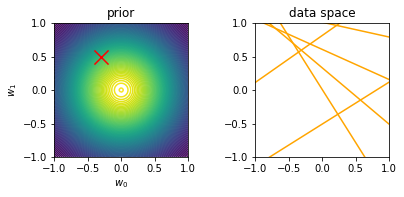

In [5]:
# Plot the first row figures
w0, w1 = np.meshgrid(
    np.linspace(-1, 1, 100),
    np.linspace(-1, 1, 100))
w = np.array([w0, w1]).transpose(1, 2, 0)

plt.subplot(1, 2, 1)
plt.scatter(-0.3, 0.5, s=200, marker="x", color='r', zorder=2)
plt.contour(w0, w1, multivariate_normal.pdf(w, m_0, S_0), 100, zorder=1)
plt.gca().set_aspect('equal')
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")
plt.title("prior")

plt.subplot(1, 2, 2)
plt.plot(x,y_draw, c="orange")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("data space")
plt.subplots_adjust(wspace=0.5)
plt.show()

**Exercise 2** Code function <span style="color:blue">Posterior()</span> that calculates the parameters of the posterior distribution given the general form of a Gaussian prior (3.49) and available data. Use formulas (3.50)-(3.51)


In [6]:
def Posterior(Phi, t, m_prior, S_prior, beta):
    """
    Purpose:
        Calculate the parameters of the posterior distribution given Gaussian prior and precision beta
    Inputs:
        Phi     (n,k) matrix, design matrix
        t       (n,) vector, target variable
        m_prior (k,) vector, prior mean
        S_prior (k,k) matrix, prior covariance
        beta    double, precision parameter of noise
    Output:
        m_post  (k,) vector, posterior mean
        S_post  (k,k) matrix, posterior variance
    """
    n,k = np.shape(Phi)
    
    S_N_inv = np.linalg.inv(S_prior) + beta*Phi.T@Phi
    m_post = np.linalg.inv(S_N_inv)@(np.linalg.inv(S_prior)@m_prior + beta*Phi.T@t)
    S_post = np.linalg.inv(S_N_inv)
    
    return m_post, S_post

**Exercise 3.** Assume that you observe a single data point (0.9, 0), that is $x_1=0.9$ and $t_1=0$. Calculate the parameters of the posterior and plot the posterior distribution against w0 and w1 and 6 draws from the posterior in the data space (2nd and 3rd figures of the second raw in Figure 3.7). You will plot the likelihood of the data point later.

In [7]:
x1 = 0.9
t1 = 0

Phi1 = np.array([[1,x1]])
t1 = np.array([t1])

#Calculate posteriors from the function Posterior created above
m_post1, S_post1 = Posterior(Phi1, t1, m_0, S_0, beta)

w_draw1 = multivariate_normal.rvs(m_post1, S_post1, size=6)
y_draw1 = lr_predict(w_draw1,x)

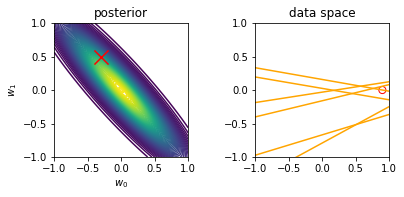

In [8]:
# plot the two right-handside figures from the second row

# Contour plot of the posterior
plt.subplot(1, 2, 1)
plt.scatter(-0.3, 0.5, s=200, marker="x", color='r', zorder=2)
plt.contour(w0, w1, multivariate_normal.pdf(w, m_post1, S_post1), 100, zorder=1)
plt.gca().set_aspect('equal')
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")
plt.title("posterior")

# Plot of the data space
plt.subplot(1, 2, 2)
plt.plot(x,y_draw1, c="orange")
plt.scatter(x1, t1, s=50, marker="o", edgecolors='r',facecolors='none')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("data space")
plt.subplots_adjust(wspace=0.5)
plt.show()


**Exercise 4.** Assume now that one more data points comes out: (-0.75, -0.5). Update the posterior accordingly. Again plot the posterior distribution against w0 and w1 and 6 draws from the posterior in the data space (2nd and 3rd figures of the third raw in Figure 3.7) based on these two observations. Note, that you should update the posterior from the previous step rather than calculate posterior based on the initial prior and two data points. Although these two approaches would result in the same posterior, we want to see how Bayesian learning works sequentially.

In [9]:
x2 = -0.75
t2 = -0.5

Phi2 = np.array([[1,x2]])
t2 = np.array([t2])

m_post2, S_post2 = Posterior(Phi2, t2, m_post1, S_post1, beta)

w_draw2 = multivariate_normal.rvs(m_post2, S_post2, size=6)
y_draw2 = lr_predict(w_draw2,x)

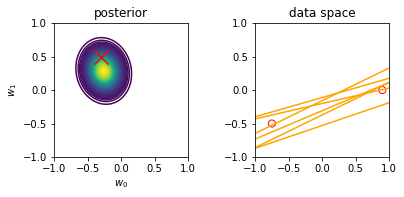

In [10]:
# plot two figures from the third row

# Contour plot of the posterior
plt.subplot(1, 2, 1)
plt.scatter(-0.3, 0.5, s=200, marker="x", color='r', zorder=2)
plt.contour(w0, w1, multivariate_normal.pdf(w, m_post2, S_post2), 100, zorder=1)
plt.gca().set_aspect('equal')
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")
plt.title("posterior")

# Plot of the data space
plt.subplot(1, 2, 2)
plt.plot(x,y_draw2, c="orange")
plt.scatter([x1,x2], [t1,t2], s=50, marker="o", edgecolors='r', facecolors='none')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("data space")
plt.subplots_adjust(wspace=0.5)
plt.show()


**Exercise 5.** Let's now look at the likelihood functions. First, code the log-likelihood function for the linear model. Then, plot likelihood values against w0 and w1 for the first data point alone and then for the second point alone. In other words, replicate likelihood figures in the second and third rows. Additionally, plot the likelihood function for two data points. Comment on your figures. Make sure you understand connection with the previous steps. 

In [11]:
def loglike(Phi, t, w, beta):
    """
    Purpose:
        Calculate the loglikelihood value of the linear model
    Inputs:
        Phi    (n,k) matrix, design matrix
        t      (n,) vector, target variable
        w      (k,) vector, weights
        beta   double, noise's precision parameter
    Output:
        loglike  double, loglikelihod value
    """
    n = np.size(t)
    loglike = (n/2)*np.log(beta)-(n/2)*np.log(2*np.pi)-beta/2 * np.sum((t - Phi@w)**2)
    
    return loglike

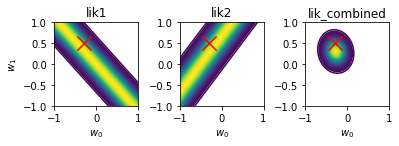

In [12]:
# plot 3 figures, the third one is not illustated in the book

loglik1 = np.reshape([loglike(Phi1, t1, w[i,j,:], beta) for i in range(w.shape[0]) for j in range(w.shape[1])],(100,100))
loglik2 = np.reshape([loglike(Phi2, t2, w[i,j,:], beta) for i in range(w.shape[0]) for j in range(w.shape[1])],(100,100))
t_comb = np.append(t1, t2)
Phi_comb = np.vstack((Phi1, Phi2))
loglik_comb = np.reshape([loglike(Phi_comb, t_comb, w[i,j,:], beta) for i in range(w.shape[0]) for j in range(w.shape[1])],(100,100))

# Plot of the likelihood after observing one data point
plt.subplot(1, 3, 1)
plt.scatter(-0.3, 0.5, s=200, marker="x", color='red', zorder=2)
plt.contour(w0, w1, np.exp(loglik1), 100, zorder=1)
plt.gca().set_aspect('equal')
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")
plt.title("lik1")

# Plot of the likelihood after observing the second data point
plt.subplot(1, 3, 2)
plt.scatter(-0.3, 0.5, s=200, marker="x", color='r', zorder=2)
plt.contour(w0, w1, np.exp(loglik2), 100, zorder=1)
plt.gca().set_aspect('equal')
plt.xlabel("$w_0$")
plt.title("lik2")

# Plot of the likelihood after observing two data points
plt.subplot(1, 3, 3)
plt.scatter(-0.3, 0.5, s=200, marker="x", color='r', zorder=2)
plt.contour(w0, w1, np.exp(loglik_comb), 100, zorder=1)
plt.gca().set_aspect('equal')
plt.xlabel("$w_0$")
plt.title("lik_combined")
plt.subplots_adjust(wspace=0.5)
plt.show()


In the first figure, we see the likelihood after observing one data point (x1, t1). From Bishop pg. 154, we know that the likelihood function provides a soft constraint that the line must pass close to the data point, which holds true for this figure. The true parameter values are marked by the red cross.

The second figure is the likelihood after observing the second datapoint (x2, t2). Again, the true parameter values are marked by the red cross.

The third figure is the likelihood for two data points, which result in circular contours. Again, the true parameter values are marked by the red cross.

**Exercise 6.** Assume now that you observe 18 data points drawn from the dgp, that is 
$$t = -0.3 + 0.5\cdot x + \varepsilon$$

where $ x \sim U([-1,1])$ and $\varepsilon \sim N(0,1/\beta)$.

Again plot the posterior distribution and 6 draws from the posterior in the data space (right-hand column) based on these 20 observations. Note, that you should update the posterior from the previous step rather than calculate posterior based on the initial prior and 20 data points. Although these two approaches would result in the same posterior, we want to see how Bayesian learning works sequentially. However, it is not necessary to update posterior sequentially for every point as you could do that jointly.

In [17]:
# simulate 18 data points
n = 18
Phi3 = np.array([np.ones(n),np.random.uniform(low=-1, size=n)]).T
t = -0.3 + 0.5*Phi3[:,1] + np.random.normal(loc=0.0, scale=1/beta, size=n)
t = np.append(t_comb, t)
Phi3 = np.vstack((Phi_comb, Phi3))

#update posterior
m_post3, S_post3 = Posterior(Phi3, t, m_post2, S_post2, beta)

w_draw3 = multivariate_normal.rvs(m_post3, S_post3, size=6)
y_draw3 = lr_predict(w_draw3,x)

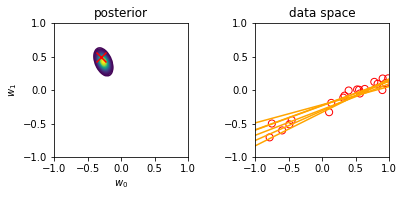

In [18]:
# plot two figures from the fourth row

# Contour plot of the posterior
plt.subplot(1, 2, 1)
plt.scatter(-0.3, 0.5, s=100, marker="x", color='r', zorder=2)
plt.contour(w0, w1, multivariate_normal.pdf(w, m_post3, S_post3), 100, zorder=1)
plt.gca().set_aspect('equal')
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")
plt.title("posterior")

# Plot of the data space
plt.subplot(1, 2, 2)
plt.plot(x,y_draw3, c="orange")
plt.scatter(Phi3[:,1], t, s=50, marker="o", edgecolors='r', facecolors='none')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("data space")
plt.subplots_adjust(wspace=0.5)
plt.show()

**Exercise 7: What happens if $\alpha$ is increased to 20? Explain.**

Answer: If alpha increases to 20, the variance of the prior distribution becomes 10 times smaller and "less explaining". The Bayesian learning process will be slower as the posterior distribution is updated in smaller steps. The difference can not be seen after 20 data points, but the first 2 datapoints converge slower to the actual values than they do with lower alpha.

## Part 2: Recreating Figure 3.14 of Bishop
Figure 3.14 on p. 168 of Bishop shows how the log model evidence is maximized for a cubic regression. Let's see if we can recreate this figure.
The data is shown in Figure 1.2 (p.7 of Bishop), which refers to Appendix A:

- the DGP is given by $sin(2\pi x)$, 
- where $x$ are uniformly generated in range(0,1) and 
- random Gaussian noise is added having a standard deviation of 0.3. This corresponds to a precision of $\beta=100/9$. 

In the code shown below, the $x$-values are linearly spaced between 0 and 1.

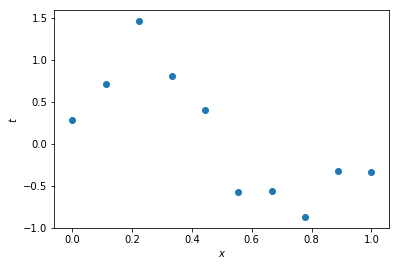

In [15]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
from math import pi
N=10
beta=100./9.   # precision =1/0.3^2
x=np.linspace(0,1,N)
np.random.seed(741)      # everybody the same data
eps=np.random.normal(0,scale=1/sqrt(beta),size=N)
t=np.sin(2*np.pi*x)+eps
plt.scatter(x,t)
plt.xlabel("$x$")
plt.ylabel("$t$")
plt.show()

**Exercise 8** Recreate Figure 3.14 as accurate as possible. At the bottom of p. 167, Bishop says that "a prior of the form (1.65) with the parameter $\alpha$ fixed at $\alpha=5 \times 10^{-3}$" is assumed. Below, you can already find the structure to generate the design matrix $\Phi$ (by adding powers of $x$ of the matrix). You should store the log model evidence in the array `lmarlik`.

Note: due to different data, you will be not able to exactly replicate the figure.

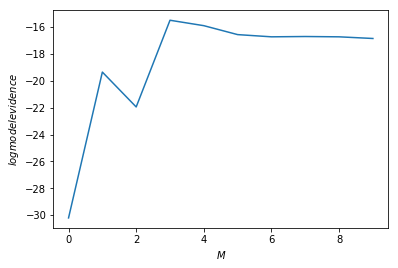

In [16]:
alpha=5*10**(-3)               # see line 3 from below on p. 167 of Bishop
PHI=np.ones(N).reshape(N,1)    # start with only a constant
Mmax=10
Mrange=np.arange(Mmax)         # array contain the number of weights (bias/intercept excluded)
lmarlik=np.zeros(Mmax)         # array containing the log model evidence
for i in Mrange:
    M=i+1;                     # dimension of w
    A = alpha*np.eye(PHI.shape[1]) + beta* PHI.T@PHI
    m_n = beta * np.linalg.inv(A) @ PHI.T @ t
    error = beta/2 * np.linalg.norm(t-PHI@m_n)**2 + alpha/2 * m_n.T@m_n
    lmarlik[i] = M/2 * np.log(alpha) + N/2 * np.log(beta) - error - np.log(np.linalg.det(A))/2 - N/2 * np.log(2*pi)
    xpowerM=(x**M).reshape(N,1)
    PHI=np.hstack((PHI,xpowerM))
    
plt.plot(Mrange,lmarlik)
plt.xlabel("$M$")
plt.ylabel("$log model evidence$")
plt.show()